In [1]:
import numpy as np
import networkx as nx
import pygad
from core_periphery import Stochastic_Block_Model

# Load the graph and adjacency matrix
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)
n = A.shape[0]

# Initialize the SBM class with the adjacency matrix
sbm = Stochastic_Block_Model(G, A)

# Parameters for Borgatti and Everett correlation optimization
ga_instance_borgatti = pygad.GA(
    num_generations=1000,
    num_parents_mating=5,
    fitness_func=sbm.fitness_function_borgatti_everett,
    sol_per_pop=20,
    num_genes=n,
    gene_type=float,
    gene_space=[0, 1],  # Genes will be floats between 0 and 1
    mutation_type="random",
    mutation_percent_genes=10,
)

# Run the genetic algorithm for Borgatti and Everett correlation
ga_instance_borgatti.run()

# Get the best solution for Borgatti and Everett correlation
solution_borgatti, solution_fitness_borgatti, solution_idx_borgatti = ga_instance_borgatti.best_solution()
best_core_indices_borgatti = [i for i, gene in enumerate(solution_borgatti) if gene > 0.5]
ρ = sbm.borgatti_everett_correlation(best_core_indices_borgatti)

print("-----------------------------")
print("*** Borgatti Everett")
print(f"Best core indices (Borgatti and Everett): {best_core_indices_borgatti}")
print(f"Maximum Borgatti and Everett correlation ρ: {ρ}")

# Parameters for Brusco metric optimization
ga_instance_brusco = pygad.GA(
    num_generations=1000,
    num_parents_mating=5,
    fitness_func=sbm.fitness_function_brusco_metric,
    sol_per_pop=20,
    num_genes=n,
    gene_type=float,
    gene_space=[0, 1],  # Genes will be floats between 0 and 1
    mutation_type="random",
    mutation_percent_genes=10,
)

# Run the genetic algorithm for Brusco metric
ga_instance_brusco.run()

# Get the best solution for Brusco metric
solution_brusco, solution_fitness_brusco, solution_idx_brusco = ga_instance_brusco.best_solution()
best_core_indices_brusco = [i for i, gene in enumerate(solution_brusco) if gene > 0.5]
Z = sbm.brusco_metric(best_core_indices_brusco)
print("-----------------------------")
print("*** Brusco")
print(f"Best core indices (Brusco): {best_core_indices_brusco}")
print(f"Maximum Brusco metric Z: {Z}")

/Users/jeongjin/miniconda3/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


-----------------------------
*** Borgatti Everett
Best core indices (Borgatti and Everett): [0, 1, 32, 33]
Maximum Borgatti and Everett correlation ρ: 0.4234938453354853


/Users/jeongjin/miniconda3/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


-----------------------------
*** Brusco
Best core indices (Brusco): [33]
Maximum Brusco metric Z: 467


In [4]:
G.edges.data

<bound method OutEdgeView.data of EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)])>

In [2]:
from core_periphery import Transport
from core_periphery import Rossa
from core_periphery import Minre
from core_periphery import Lip
from core_periphery import Rombach

# Example usage
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)
n = A.shape[0]
tp = Transport(G, A)
metric, best_cores = tp.holme_metric(G, 1000)

print("-----------------------------")
print("*** Holme")
print(f"Best core indices (Holme): {best_cores}")
print(f"Holme Metric: {metric}")
print("-----------------------------")
metric, best_cores, _ = tp.silva_core_coefficient(G)

print("*** Silva")
print(f"Best core indices (Silva): {best_cores}")
print(f"Silva Metric (Core Coefficient): {metric}")

print("-----------------------------")

print("*** Rossa")
rossa = Rossa(G)
alpha = rossa.get_alpha()
cp_centralization = rossa.get_cp_centralization()
z_score = rossa.calculate_z_score(num_randomizations=100)
core_nodes = rossa.extract_core_nodes(0.7)
#print("Alpha values:", alpha)
print("CP-Centralization:", cp_centralization)
print("Z-Score:", z_score)
print("Core nodes (threshold={}):".format(0.7), core_nodes)

print("-----------------------------")

print("*** Minre")
model = Minre(G, A)
w, best_cores, pre = model.minres()

print("Core Nodes:", best_cores)
print("Proportional Reduction of Error (PRE):", pre)

print("-----------------------------")

print("*** Lip")
model = Lip(G, A)
z_influence, cores, z = model.calculate()

print("Core Nodes:", cores)
print("Z index:", z)


print("-----------------------------")

print("*** Rombach")
model = Rombach(G, A)
best_order, core_scores_optimized, result, R_gamma = model.optimize()

print("Core Nodes:", result)
print("R_Gamma index:", R_gamma)

-----------------------------
*** Holme
Best core indices (Holme): [0, 1, 2, 3, 32, 33, 7, 8, 13, 30]
Holme Metric: 7.906256760605423
-----------------------------
*** Silva
Best core indices (Silva): [0, 2, 33, 31, 8, 13]
Silva Metric (Core Coefficient): 0.8235294117647058
-----------------------------
*** Rossa
CP-Centralization: 0.6408980397132782
Z-Score: 2.011772034806061
Core nodes (threshold=0.7): [0, 32, 33]
-----------------------------
*** Minre
Core Nodes: [ 0  1  2  8 13 32 33]
Proportional Reduction of Error (PRE): 0.20325790109450548
-----------------------------
*** Lip
Core Nodes: [33  0 32  2  1  3]
Z index: 23.0
-----------------------------
*** Rombach
Core Nodes: [33, 7, 13, 3, 1, 2, 0]
R_Gamma index: 36.699691825259514


*** KM_ER
Core Nodes: {0: [0, 1, 2, 3], 1: [4, 5, 6], 2: [32, 33], 3: [23, 24]}
Q_cp index: 44.85026737967909
Q_c index: [18.27272727  4.7486631  18.52406417  3.30481283]
Significant cores: [0, 1, 2, 3]
Total Q_cp_BE: 0.003031410408506986
-----------------------------


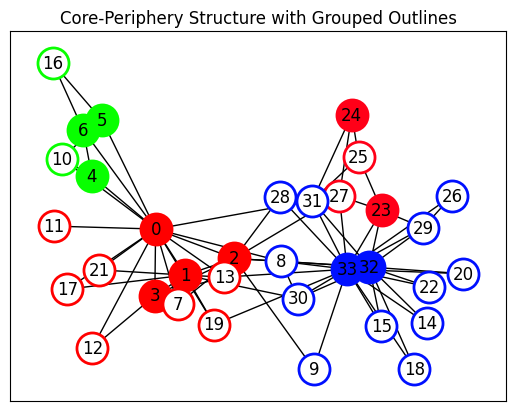

In [21]:
from core_periphery import KM_ER
import numpy as np
import networkx as nx
import pygad
from core_periphery import Stochastic_Block_Model

# Load the graph and adjacency matrix
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)

n = A.shape[0]


print("*** KM_ER")
model = KM_ER(G, A)
c, x, Qcp, Qc = model.optimize( max_updates=1000)

multi_cores = dict()
for i in range(len(x)):
    if c[i] not in multi_cores:
        multi_cores[c[i]] = []  # Correctly initialize a list for the new key
    if x[i] == 1:
        multi_cores[c[i]].append(i)  # Append the node index i to the list for core c[i]

print("Core Nodes:", multi_cores)
print("Q_cp index:", Qcp)
print("Q_c index:", Qc)
significant_cores, total_Q_cp_BE = model.calculate_multi_core_Q_cp_BE(c, x)

print("Significant cores:", significant_cores)
print("Total Q_cp_BE:", total_Q_cp_BE)

print("-----------------------------")

model.visualize_core_periphery(c, x)

*** KM_Config
Core Nodes: {0: [0, 1, 2, 3], 1: [10], 2: [5, 16], 3: [8, 14, 15, 18, 20, 22, 23, 24, 29, 30, 31, 33]}
Q_cp index: 2.101495726495727
-----------------------------


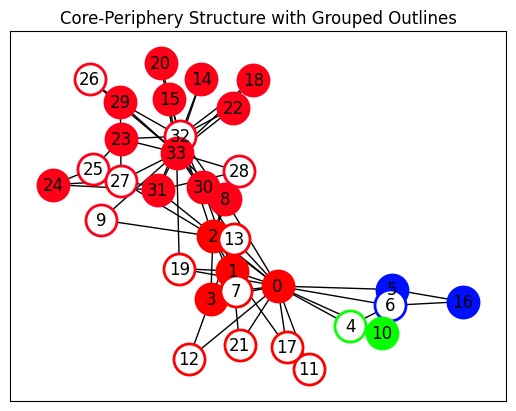

In [42]:
from core_periphery import KM_Config


# Load the graph and adjacency matrix
G = nx.karate_club_graph()
A = nx.to_numpy_array(G)
A = np.where(A != 0, 1, 0)

n = A.shape[0]


print("*** KM_Config")
model = KM_Config(G, A)
c, x, Qcp = model.optimize( max_updates=1000)

multi_cores = dict()
for i in range(len(x)):
    if c[i] not in multi_cores:
        multi_cores[c[i]] = []  # Correctly initialize a list for the new key
    if x[i] == 1:
        multi_cores[c[i]].append(i)  # Append the node index i to the list for core c[i]

print("Core Nodes:", multi_cores)
print("Q_cp index:", Qcp)
# significant_cores, total_Q_cp_BE = model.calculate_multi_core_Q_cp_BE(c, x)

# print("Significant cores:", significant_cores)
# print("Total Q_cp_BE:", total_Q_cp_BE)

print("-----------------------------")

model.visualize_core_periphery(c, x)

Best division (0: periphery, 1: core): {32, 33, 2, 0, 1}
Best q value: 0.7256157635467981


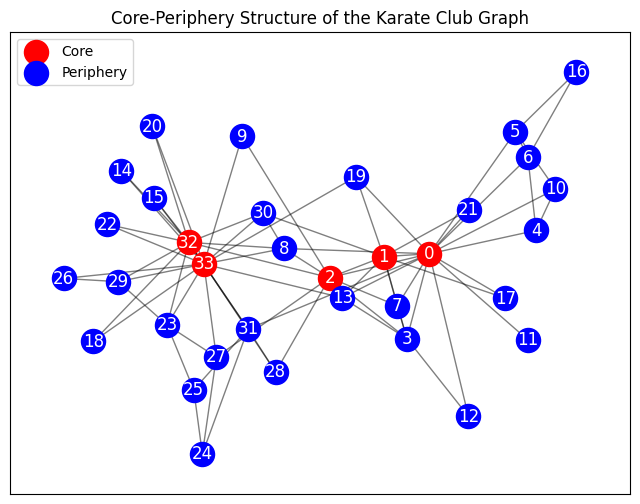

In [1]:

from core_periphery import Lap_Core
import numpy as np
import networkx as nx

G = nx.karate_club_graph()
model = Lap_Core(G)

scores, core_set, q = model.low_rank_core()
print("Best division (0: periphery, 1: core):", core_set)
print("Best q value:", q)


model.visualize_core_periphery(set(core_set))

In [7]:
from core_periphery import Surprise
import networkx as nx
# Example usage

G = nx.karate_club_graph()  # 사용할 그래프 정의 (예: Karate Club 그래프)
A = nx.to_numpy_array(G)

model = Surprise(G, A)
best_x, core_set, best_q = model.core_periphery_optimization(iterations=2)

print("Best division (0: periphery, 1: core):", core_set)
print("Best MEH value:", best_q)



Best division (0: periphery, 1: core): [ 0  1  2 32 33]
Best MEH value: 9.489957615359026e-26
